In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


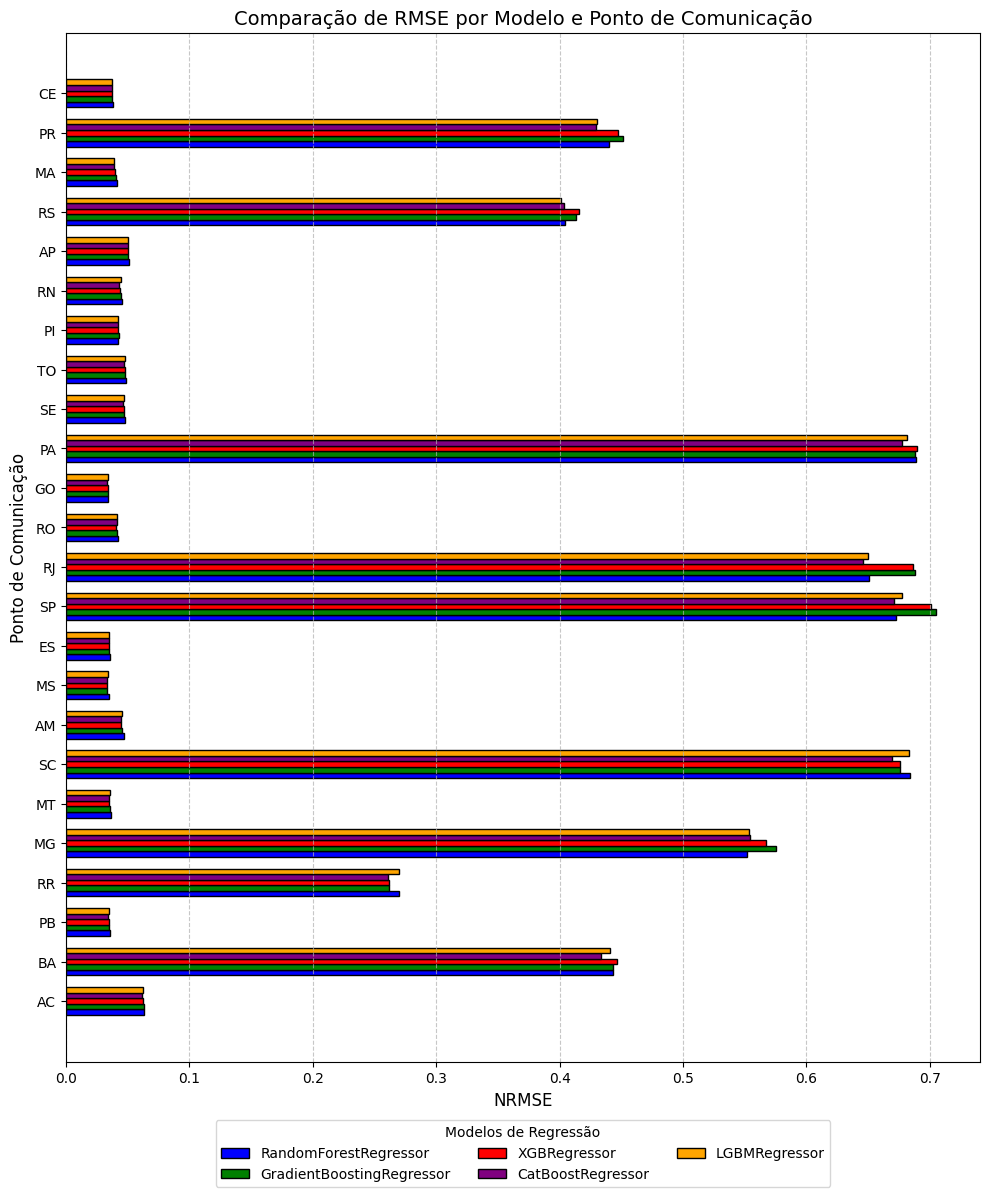

In [4]:
import os

bbr = pd.read_csv('../results/nrmse/regression_Vazao_bbr_nrmse.csv')
columns_to_drop = ['PolynomialRegression', 'AdaBoostRegressor', 'ElasticNet', 
                   'LinearRegression', 'MLPRegressor', 'SVR', 'KNeighborsRegressor']


bbr = bbr.drop(columns=columns_to_drop, errors='ignore')

models = bbr.columns[1:]
y = np.arange(len(bbr['source']))  
height = 0.7 / len(models)         

custom_colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'maroon', 'brown'
]

fig, ax = plt.subplots(figsize=(10, 12))  

for i, model in enumerate(models):
    ax.barh(y + i * height, bbr[model], height, label=model, color=custom_colors[i], edgecolor='black') 

ax.set_title("Comparação de RMSE por Modelo e Ponto de Comunicação", fontsize=14)
ax.set_xlabel("NRMSE", fontsize=12)  
ax.set_ylabel("Ponto de Comunicação", fontsize=12)  
ax.set_yticks(y + height * (len(models) / 2 - 0.5))
ax.set_yticklabels(bbr['source'].str.upper())

plt.subplots_adjust(bottom=0.15)

ax.legend(
    title="Modelos de Regressão",
    bbox_to_anchor=(0.5, -0.05),  
    loc='upper center',
    ncol=3
)

ax.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()

plt.show()
